In [2]:
import numpy as np
import pandas as pd


import tensorflow as tf

In [30]:
data = pd.read_csv('daily_rv_hour_data.csv')

In [31]:
data

,Unnamed: 0,AAPL.O,MSFT.O,GOOGL.O,GOOG.O,AMZN.O,NVDA.O,META.O,BRKb,TSLA.O,...,MDLZ.O,LRCX.O,REGN.O,AMT,PGR,ADP.O,ETN,MMC,ADI.O,CB
0,1/11/2023,0.000130,0.000072,0.000125,0.000110,0.000259,0.000196,0.000155,0.000047,0.000323,...,0.000058,0.000287,0.000251,0.000092,0.000042,0.000038,0.000057,0.000039,0.000053,0.000019
1,1/12/2023,0.000078,0.000201,0.000077,0.000065,0.000077,0.000959,0.000443,0.000018,0.000628,...,0.000050,0.000540,0.000144,0.000229,0.000163,0.000083,0.000051,0.000088,0.000041,0.000069
2,1/13/2023,0.000139,0.000079,0.000071,0.000065,0.000196,0.000579,0.000032,0.000009,0.001005,...,0.000072,0.000113,0.000098,0.000039,0.000006,0.000054,0.000012,0.000044,0.000068,0.000038
3,1/17/2023,0.000024,0.000043,0.000017,0.000020,0.000084,0.000118,0.000088,0.000028,0.000181,...,0.000007,0.000153,0.000055,0.000134,0.000067,0.000099,0.000066,0.000019,0.000068,0.000012
4,1/18/2023,0.000130,0.000188,0.000092,0.000109,0.000180,0.000234,0.000286,0.000099,0.000996,...,0.000195,0.000339,0.000051,0.000368,0.000103,0.000069,0.000254,0.000123,0.000105,0.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1/4/2024,0.000038,0.000028,0.000059,0.000049,0.000109,0.000132,0.000052,0.000038,0.000119,...,0.000029,0.000140,0.000095,0.000210,0.000174,0.000012,0.000102,0.000010,0.000080,0.000068
247,1/5/2024,0.000139,0.000075,0.000046,0.000044,0.000086,0.000254,0.000111,0.000018,0.000121,...,0.000071,0.000107,0.000088,0.000187,0.000066,0.000017,0.000040,0.000062,0.000069,0.000025
248,1/8/2024,0.000024,0.000044,0.000035,0.000036,0.000052,0.000183,0.000070,0.000048,0.000155,...,0.000025,0.000055,0.000113,0.000071,0.000082,0.000009,0.000074,0.000048,0.000007,0.000042
249,1/9/2024,0.000061,0.000054,0.000073,0.000064,0.000080,0.000658,0.000055,0.000010,0.000159,...,0.000023,0.000064,0.000073,0.000149,0.000046,0.000039,0.000056,0.000018,0.000093,0.000034


In [32]:
data = data.rename(columns={"Unnamed: 0": "Date"})

In [49]:
import datetime

def str_to_datetime(s):
  split = s.split('/')
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1/10/2024')
datetime_object

datetime.datetime(2024, 1, 10, 0, 0)

In [34]:
data['Date'] = data['Date'].apply(str_to_datetime)
data['Date']

0     2023-01-11
1     2023-01-12
2     2023-01-13
3     2023-01-17
4     2023-01-18
         ...    
246   2024-01-04
247   2024-01-05
248   2024-01-08
249   2024-01-09
250   2024-01-10
Name: Date, Length: 251, dtype: datetime64[ns]

In [38]:
df = data[['Date', 'MSFT.O']]

In [40]:
df.index = df.pop('Date')
df

,MSFT.O
Date,
2023-01-11,0.000072
2023-01-12,0.000201
2023-01-13,0.000079
2023-01-17,0.000043
2023-01-18,0.000188
...,...
2024-01-04,0.000028
2024-01-05,0.000075
2024-01-08,0.000044


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

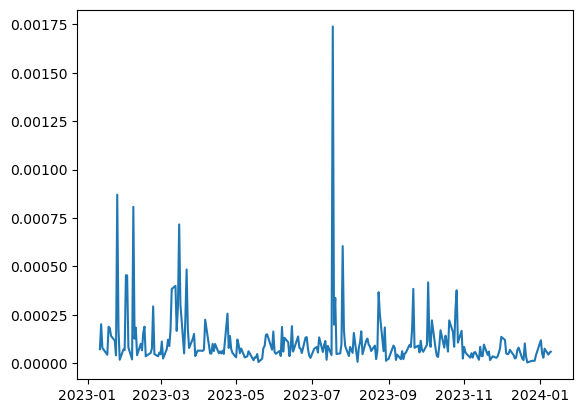

In [43]:
plt.plot(df.index, df['MSFT.O'])

In [74]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['MSFT.O'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1/17/2023', 
                                '1/10/2024', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-17,0.000072,0.000201,0.000079,0.000043
1,2023-01-18,0.000201,0.000079,0.000043,0.000188
2,2023-01-19,0.000079,0.000043,0.000188,0.000181
3,2023-01-20,0.000043,0.000188,0.000181,0.000141
4,2023-01-23,0.000188,0.000181,0.000141,0.000117
...,...,...,...,...,...
243,2024-01-04,0.000041,0.000119,0.000050,0.000028
244,2024-01-05,0.000119,0.000050,0.000028,0.000075
245,2024-01-08,0.000050,0.000028,0.000075,0.000044
246,2024-01-09,0.000028,0.000075,0.000044,0.000054


In [61]:
target_date = str_to_datetime('1/17/2023')

In [62]:
next_week = df.loc[target_date:target_date+datetime.timedelta(days=7)]

In [63]:
next_week

,MSFT.O
Date,
2023-01-17,0.000043
2023-01-18,0.000188
2023-01-19,0.000181
2023-01-20,0.000141
2023-01-23,0.000117
2023-01-24,0.000040


In [64]:
next_datetime_str = str(next_week.head(2).tail(1).index.values[0])

In [69]:
next_week.head(2).tail(1).index.values[0]

numpy.datetime64('2023-01-18T00:00:00.000000000')

In [70]:
next_date_str = next_datetime_str.split('T')[0]

In [71]:
next_date_str

'2023-01-18'

In [72]:
month_day_year = next_date_str.split('/')

In [ ]:



    month, day, year = month_day_year
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))